# Incidence of Crime in San Francisco

In this post we will be exploring a data set which contains information about the incidents reported in San Francisco during the summer months of 2014. There are some interesting trends which appear in the data, such as the prevelance of crime in the evening, times which robberies are most likely to occur and places in the city where thefts are most common.

Key finding: If you live in San Francisco, lock your stuff up, someone's going to steal it.

In [1]:
%pylab inline
import pandas as pd
from datetime import datetime
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
sanfran_df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', low_memory=False)

## Incidents by time of Day

Our first look at the data will be to explore the raw incidents reported as a function of the time of day.

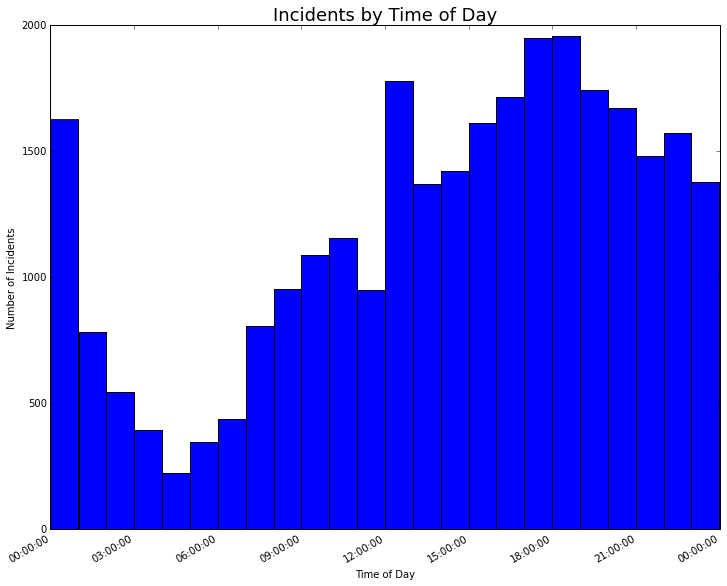

In [76]:
times = pd.to_datetime(sanfran_df.Time)
today = pd.Timestamp('00:00')
timedelta = times - today
times_ordinal = timedelta.dt.seconds/(24*60*60) + today.toordinal()
plt.figure(figsize(12,10))
ax = times_ordinal.plot(kind='hist', bins=24)
ax.xaxis_date()
plt.gcf().autofmt_xdate()
plt.title('Incidents by Time of Day', fontsize=18)
plt.ylabel('Number of Incidents')
plt.xlabel('Time of Day')

We see a clear trend with incidents peaking at around 6PM with sharp spikes from 12:00 to 1:00PM and from 12:00AM to 1:00AM. We will show why these spikes may be occurring a little later. It should be noted that this data includes all incidents, such as non-criminal and suspicious activity etc.

There is also a well defined minimum in the early hours between 3:00 and 7:00AM. We can make some sense of these trends by appealing to when people are most likely to be awake and not at work. Most people will be asleep in the early morning, hence the lower incident rates there. During the evening, peaking around 6:00PM, most people will be awake and off work (assuming most work is 9AM-5PM) and so because there are more people there will be more incidents.

## Disecting Incidents Reported During The Evening

Next, we will take a closer look at the types of incidents being reported. We'll focus on the evening hours which we define as 6:00PM to 12:00AM.

In [77]:
evening_crimes = sanfran_df[(sanfran_df['Time'] > '16:00') & (sanfran_df['Time'] < '23:59')][['Category', 'Time']]

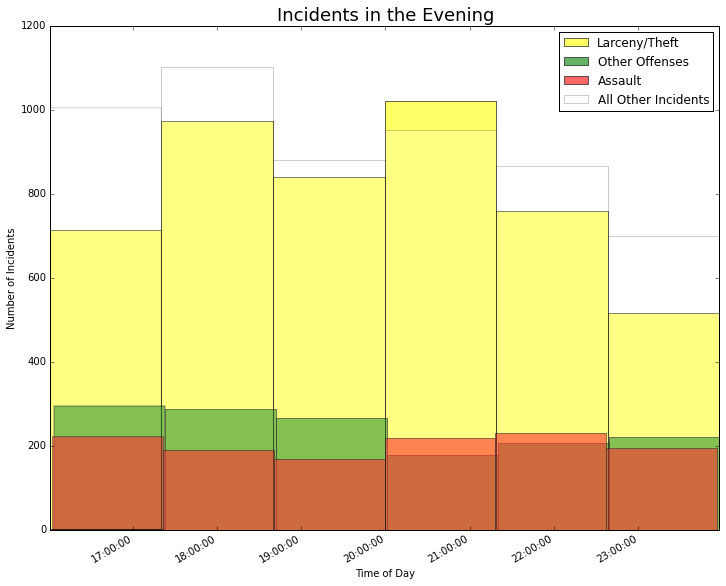

In [78]:
today = pd.Timestamp('00:00')

# All evening crimes
times = pd.to_datetime(evening_crimes.Time)
timedelta = times - today
times_ordinal = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Larceny
times = pd.to_datetime(evening_crimes[evening_crimes['Category']=='LARCENY/THEFT'].Time)
timedelta = times - today
times_ordinal_larceny = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Other
times = pd.to_datetime(evening_crimes[evening_crimes['Category']=='OTHER OFFENSES'].Time)
timedelta = times - today
times_ordinal_other = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Assault
times = pd.to_datetime(evening_crimes[evening_crimes['Category']=='ASSAULT'].Time)
timedelta = times - today
times_ordinal_assault = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Everything else
times = pd.to_datetime(evening_crimes[(evening_crimes['Category'] != 'LARCENY/THEFT') &
               (evening_crimes['Category'] != 'OTHER OFFENSES') &
               (evening_crimes['Category'] != 'ASSAULT')].Time)
timedelta = times - today
times_ordinal_else = timedelta.dt.seconds/(24*60*60) + today.toordinal()


plt.figure(figsize(12,10))
# All incidents
#ax1 = times_ordinal.plot(kind='hist', bins=6, alpha=0.5, label='All Incidents')
#ax1.xaxis_date()
# Larceny
ax2 = times_ordinal_larceny.plot(kind='hist', bins=6, color='yellow', alpha=0.6, label='Larceny/Theft')
ax2.xaxis_date()
# Other offenses
ax3 = times_ordinal_other.plot(kind='hist', bins=6, color='green', alpha=0.6, label='Other Offenses')
ax3.xaxis_date()
# Assault
ax4 = times_ordinal_assault.plot(kind='hist', bins=6, color='red', alpha=0.6, label='Assault')
ax4.xaxis_date()
# Everything else
ax4 = times_ordinal_else.plot(kind='hist', bins=6, color='white', alpha=0.2, edgecolor='black', label='All Other Incidents')
ax4.xaxis_date()

plt.gcf().autofmt_xdate()
plt.title('Incidents in the Evening', fontsize=18)
plt.ylabel('Number of Incidents')
plt.xlabel('Time of Day')
legend()

We see from this plot, that larceny and theft make up the vast majority of incidents reported. Other notable incidents include "Other Offenses" and assault. In this data set, larceny and theft do not include vehicly thefts or robbery. We can again look at the density of people as a precursor to theft, since if there are a higher density of people such as when people are off of work, a thief might be more inclined to steal something and hope to go unnoticed in a busy store for instance.

## Explaining the peaks of incidents at midday and midnight

As noted earlier, there were peaks in the incidents reported during the noon hour and at midnight. One might make a hypothesis that these hours are prime opportunities for robbery.

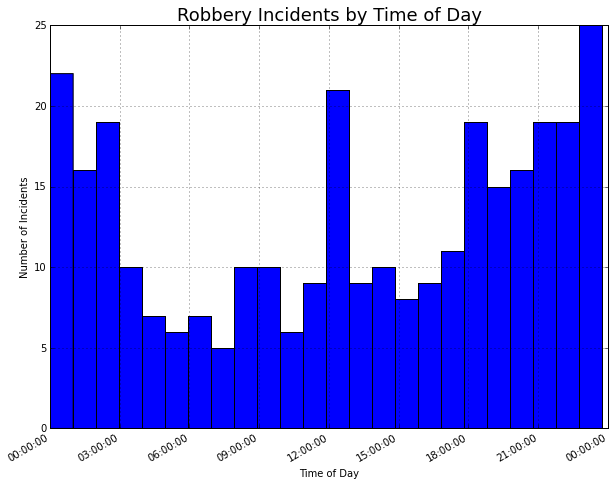

In [79]:
robbery = sanfran_df[sanfran_df['Category']=='ROBBERY']
times = pd.to_datetime(robbery.Time)
today = pd.Timestamp('00:00')
timedelta = times - today
times_ordinal = timedelta.dt.seconds/(24*60*60) + today.toordinal()
plt.figure(figsize(10,8))
ax = times_ordinal.hist(bins=24)
ax.xaxis_date()
plt.gcf().autofmt_xdate()
plt.title('Robbery Incidents by Time of Day', fontsize=18)
plt.ylabel('Number of Incidents')
plt.xlabel('Time of Day')


Indeed, by looking at the incidents of robbery as a function of time, we can see notable outliers during the noon hour and up to and around midnight.

## How do incidents vary by neighbourhood?

To answer this question we will look at the number of incidents based on neighbourhood.

In [8]:
district_counts = sanfran_df['PdDistrict'].value_counts()
districts = sanfran_df['PdDistrict'].unique()

In [9]:
index = arange(len(sanfran_df['PdDistrict'].unique()))
bar_width = 1.0

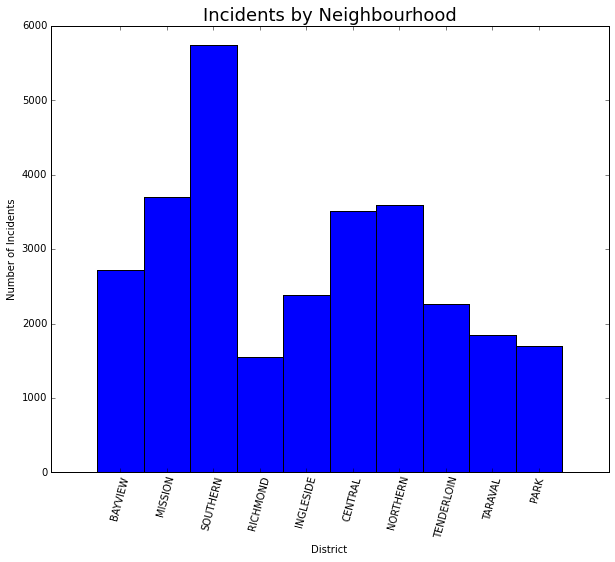

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(index + bar_width, [district_counts[i] for i in districts], bar_width)
xticks(index + bar_width + 0.5, districts, rotation=75)
title('Incidents by Neighbourhood', fontsize = 18)
ylabel('Number of Incidents')
xlabel('District')

We see from this plot that Souther San Francisco has the highest incident rate followed by Mission, Central and Northern.

## Most common incident in central San Francisco

In [46]:
incidents_central = sanfran_df[sanfran_df['PdDistrict']=='CENTRAL']['Category']
incident_list = incidents_central.value_counts().axes

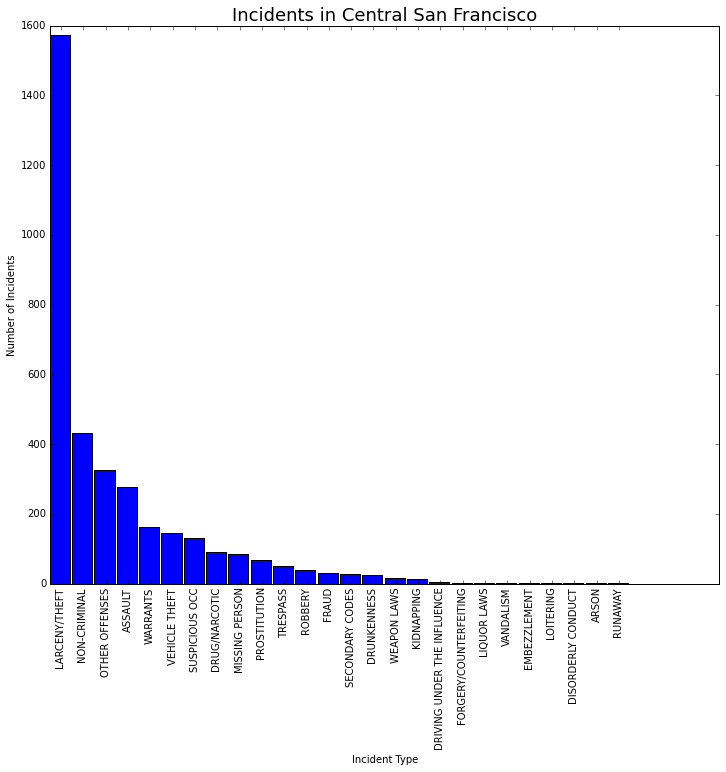

In [60]:
fig, ax = subplots(figsize=(12,10))
ax.bar(arange(len(incidents_central.unique())), incidents_central.value_counts(), width=0.9)
xticks(arange(len(incidents_central.unique()))+0.5, incident_list[0][:], rotation=90)
title('Incidents in Central San Francisco', fontsize=18)
ylabel('Number of Incidents')
xlabel('Incident Type')

We see here that by far the most common incident in Central San Francisco is larceny and theft. We can make sense of this because central San Francisco has the highest concentration of things to steal (i.e. stores, shops and affluent dwellings).

## In what areas are robberies and thefts most common?

Now we instead turn our question to include robberies and vehicle thefts and look at where these kinds of incidents are most likely to occur.

In [80]:
rob_and_theft = sanfran_df[(sanfran_df['Category']=='LARCENY/THEFT') | (sanfran_df['Category']=='ROBBERY') | (sanfran_df['Category']=='VEHICLE THEFT')]['PdDistrict']

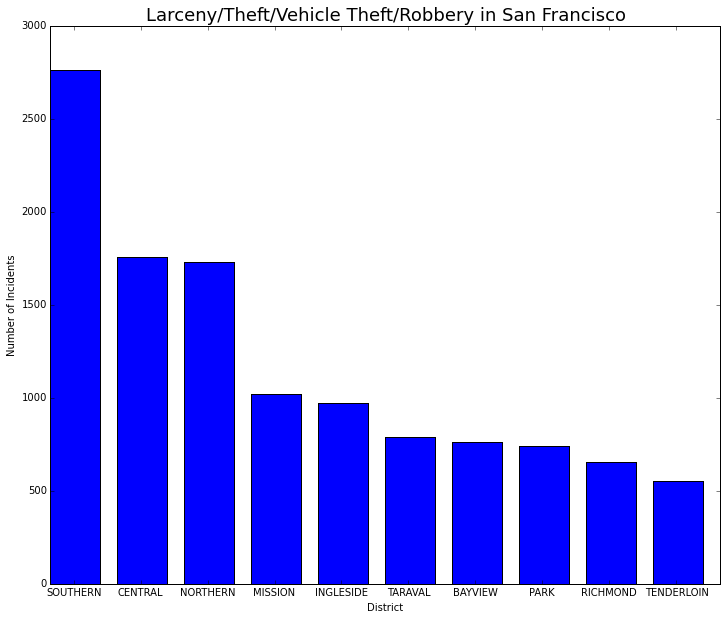

In [122]:
index = arange(len(rob_and_theft.unique()))
bar_width = 0.75
fig, ax = subplots(figsize=(12,10))
ax.bar(index, rob_and_theft.value_counts(), bar_width)
xticks(index+0.35, rob_and_theft.value_counts().axes[0][:])
title('Larceny/Theft/Vehicle Theft/Robbery in San Francisco', fontsize=18)
ylabel('Number of Incidents')
xlabel('District')

Southern San Francisco has by far the largest incidence of theft (all types), though Central and Northern San Francisco also have significant levels.

## Variation of incidents with time

Finally, we will investigate how incidents vary by month and how incidents might correlate with each other on a daily basis.

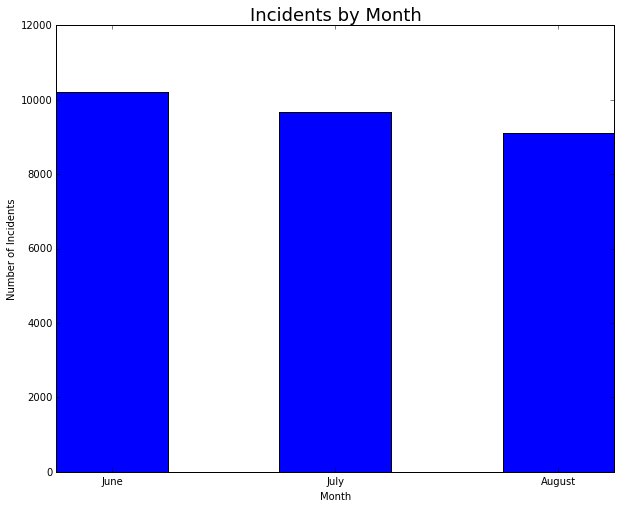

In [75]:
incidents_by_month = pd.to_datetime(sanfran_df.Date).dt.month
bar_width = 0.5
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(arange(3), incidents_by_month.value_counts(), bar_width)
xticks(arange(3) + .25, ['June', 'July', 'August'])
title('Incidents by Month', fontsize = 18)
ylabel('Number of Incidents')
xlabel('Month')

We see here that the number of incidents vary slightly by month, perhaps with a slight downward trend.

In [319]:
monthly_thefts = sanfran_df[(sanfran_df.Category == 'LARCENY/THEFT') |
                    (sanfran_df.Category == 'ASSAULT') |
                    (sanfran_df.Category == 'ROBBERY') |
                    (sanfran_df.Category == 'VEHICLE THEFT') |
                    (sanfran_df.Category == 'STOLEN PROPERTY')]

monthly_drugs_alch = sanfran_df[(sanfran_df.Category == 'DRUG/NARCOTIC') |
                    (sanfran_df.Category == 'DRIVING UNDER THE INFLUENCE') |
                    (sanfran_df.Category == 'DRUNKENNESS') |
                    (sanfran_df.Category == 'LIQUOR LAWS')]

monthly_fraud = sanfran_df[(sanfran_df.Category == 'BRIBERY') |
                    (sanfran_df.Category == 'EMBEZZLEMENT') |
                    (sanfran_df.Category == 'EXTORTION') |
                    (sanfran_df.Category == 'FRAUD') |
                    (sanfran_df.Category == 'FORGERY/COUNTERFEITING')]

monthly_loiter = sanfran_df[(sanfran_df.Category == 'LOITERING') |
                    (sanfran_df.Category == 'DISORDERLY CONDUCT') |
                    (sanfran_df.Category == 'DRUNKENNESS') |
                    (sanfran_df.Category == 'VANDALISM') |
                    (sanfran_df.Category == 'DRUG/NARCOTIC')]

monthly_prost = sanfran_df[(sanfran_df.Category == 'DRUG/NARCOTIC') |
                    (sanfran_df.Category == 'PROSTITUTION') |
                    (sanfran_df.Category == 'PORNOGRAPHY/OBSCENE MAT')]

c_tab = pd.crosstab(monthly['Category'], monthly['Date'])

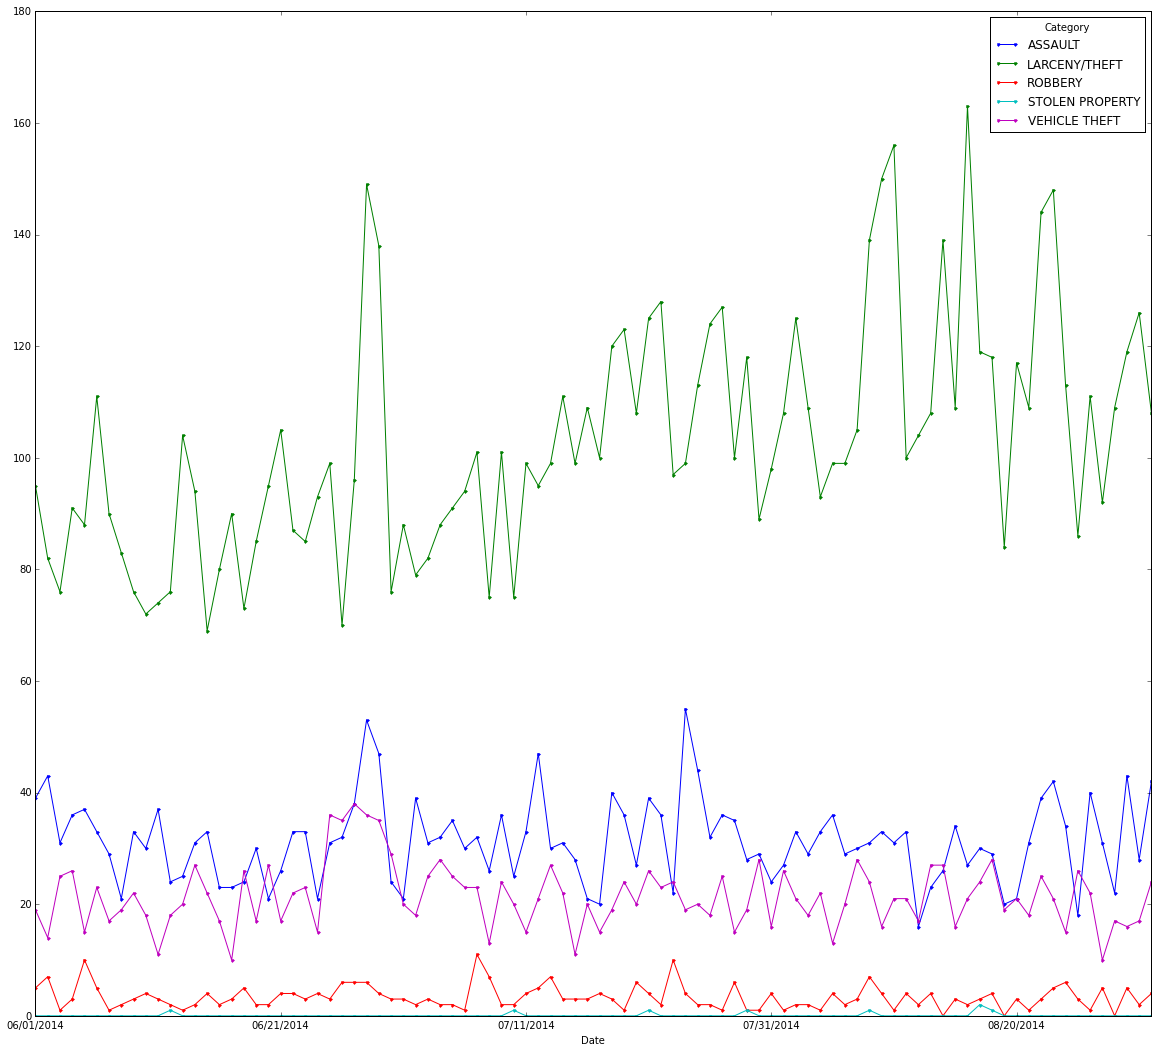

In [320]:
pd.crosstab(monthly_thefts.Category, monthly_thefts.Date).T.plot(figsize=(20,18), sharex=True, marker='.')

Here we have plotted some incidents which may correlate with each other against the date. The incents chosen were assault, robbery, larceny/theft, vehicle theft and stolen property. We see that there does indeed seem to be a correlation between these incidents.

### Other correlations / negative correlations

We tested some other sets of incidents which we expect might be correlated, but perhaps due to the small number of daily incidents, these plots do not show any sort of correlation.

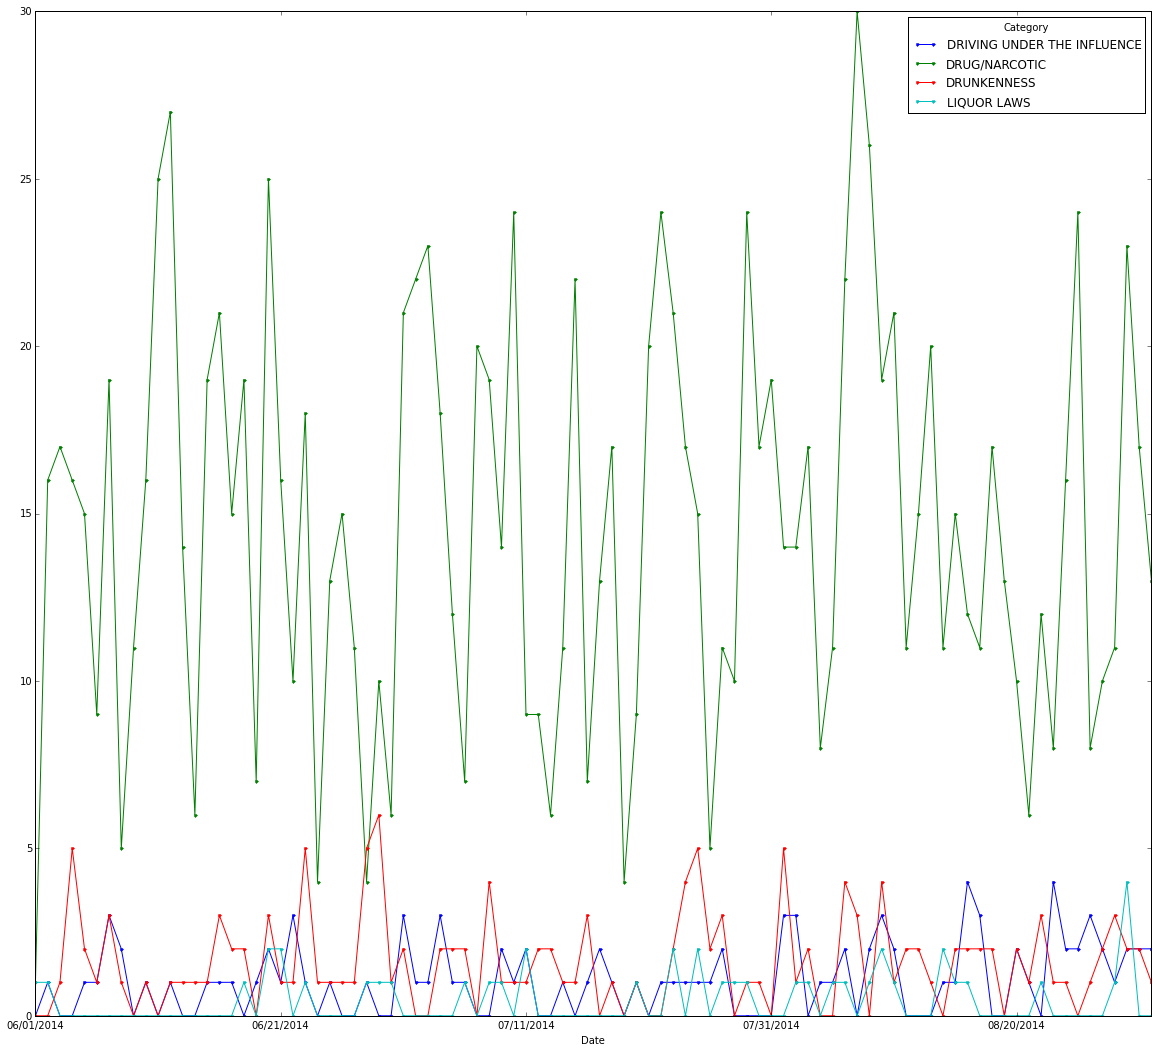

In [321]:
pd.crosstab(monthly_drugs_alch.Category, monthly_drugs_alch.Date).T.plot(figsize=(20,18), sharex=True, marker='.')

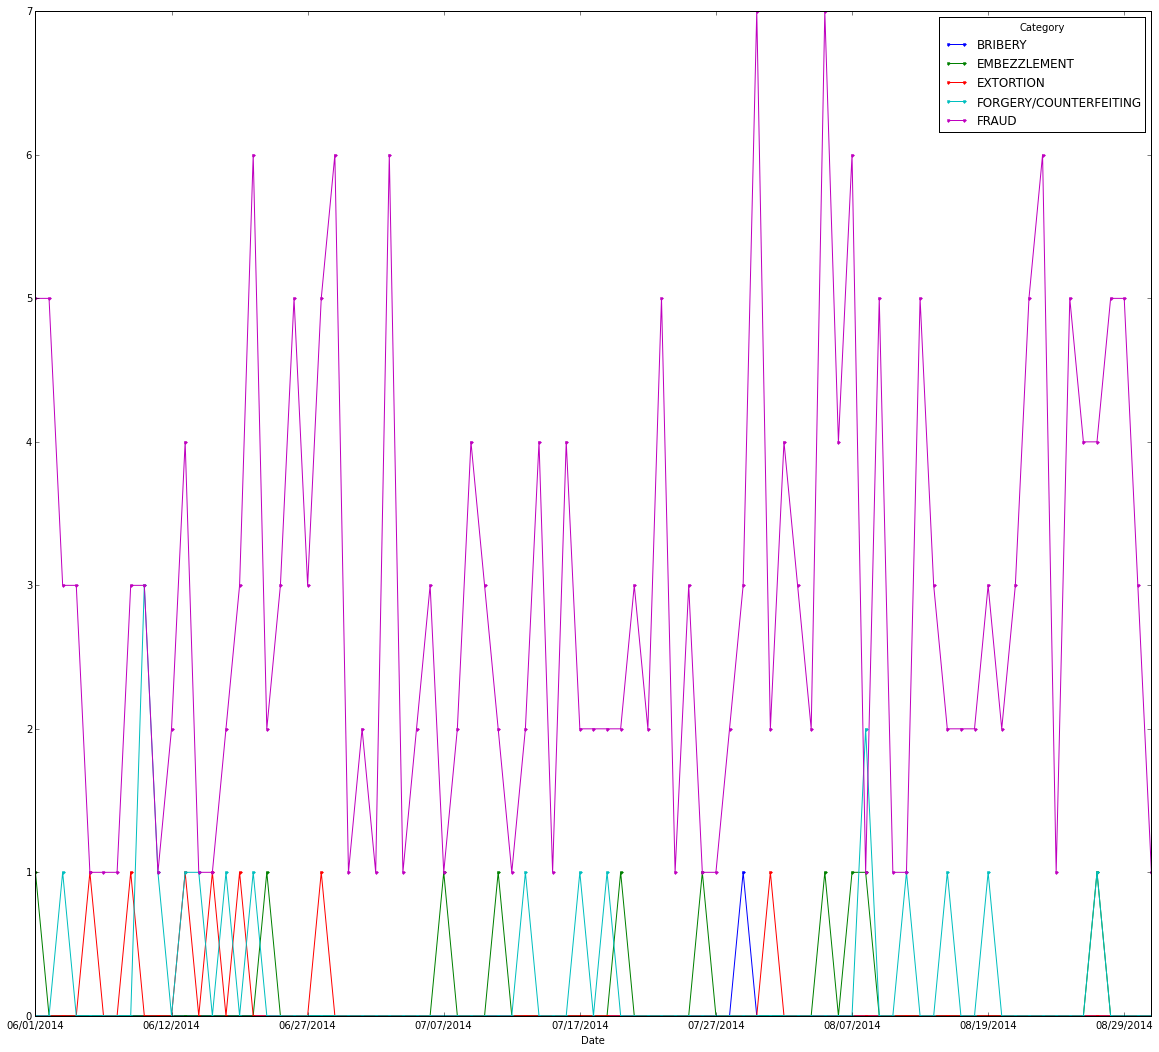

In [322]:
pd.crosstab(monthly_fraud.Category, monthly_fraud.Date).T.plot(figsize=(20,18), sharex=True, marker='.')

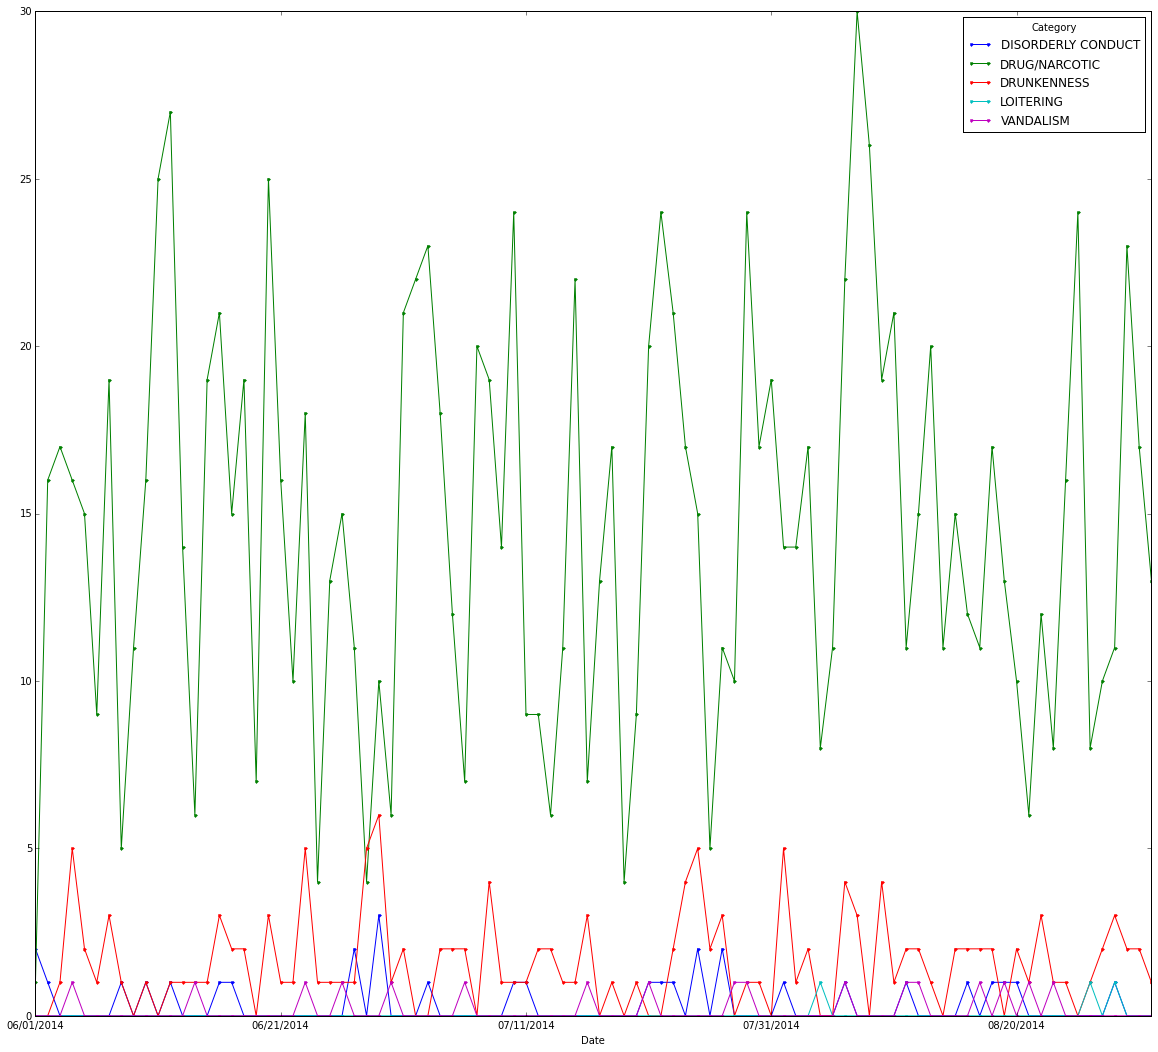

In [323]:
pd.crosstab(monthly_loiter.Category, monthly_loiter.Date).T.plot(figsize=(20,18), sharex=True, marker='.')

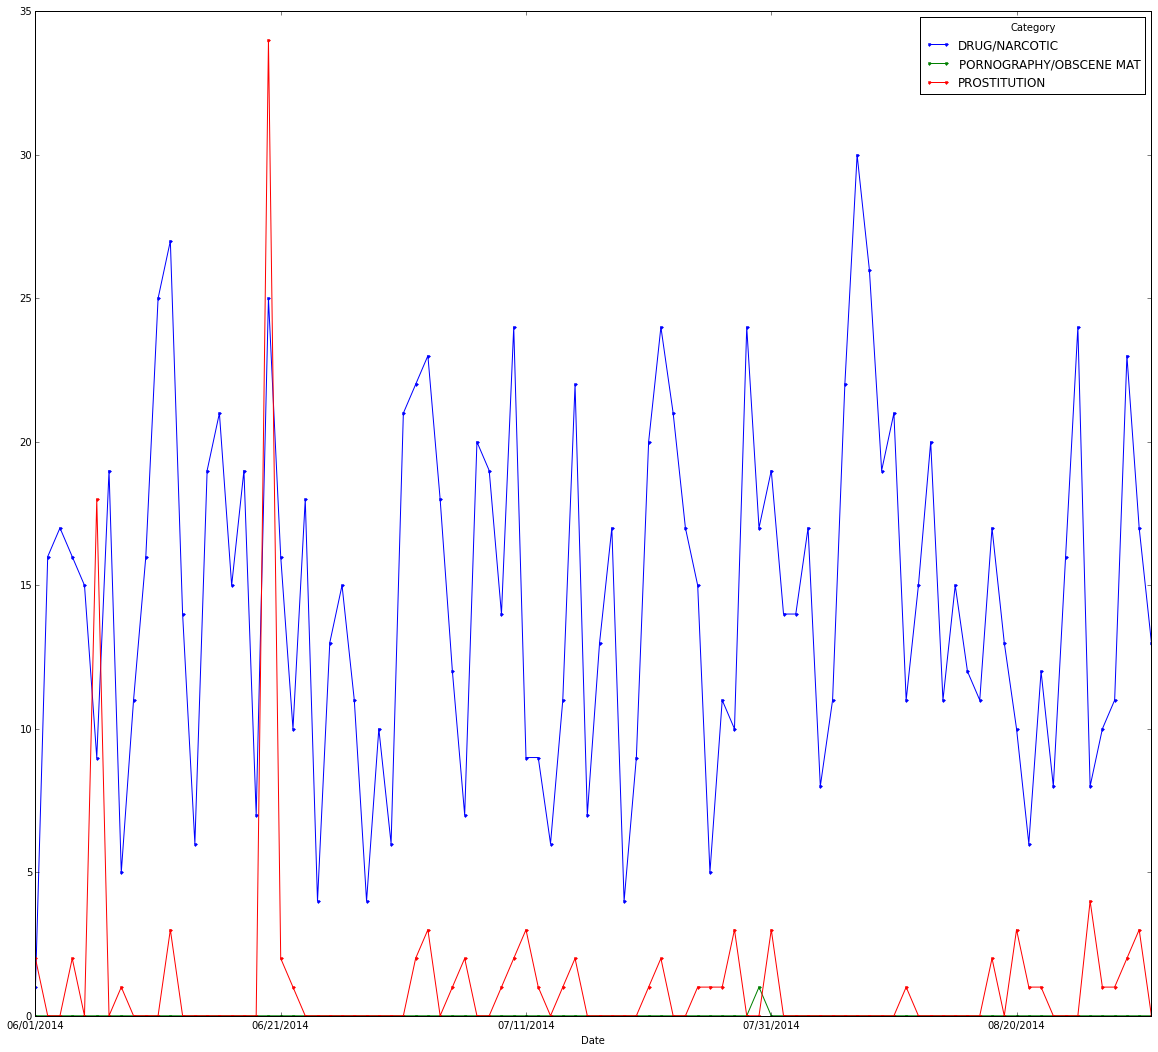

In [324]:
pd.crosstab(monthly_prost.Category, monthly_prost.Date).T.plot(figsize=(20,18), sharex=True, marker='.')